AxesSubplot(0.125,0.125;0.775x0.755)
The survive rate is: 0.3838383838383838


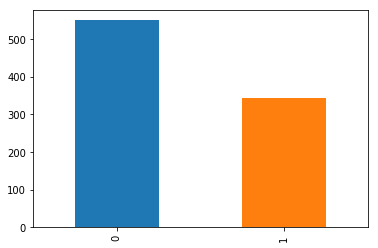

In [191]:
import pandas as pd
from collections import Counter
base_path = "PycharmProjects/KAGGLE/Titanic/"
data = pd.read_csv(base_path+"train.csv")
survived = Counter(data['Survived'])
not_survived = survived[0]
survived = survived[1]
surivive_rate = survived/(not_survived+survived)
print(data['Survived'].value_counts().plot(kind='bar'))
print("The survive rate is: {}".format(surivive_rate))


In [192]:
#Let's find the columns with NaN values
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [193]:
#Let's fill Age with the mean value
data["Age"].fillna(data["Age"].mean(), inplace=True)


In [194]:
# Let's check if there are any NaN values in age 
data.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [195]:
#How many NaN for the cabin column
data['Cabin'].isna().sum()

687

In [196]:
#Let's use only the first cabin letter and replace the missing values with 0
data['Cabin'] = data['Cabin'].str[0:1]
Counter(data['Cabin'])
data['Cabin'].fillna('0', inplace=True)
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [197]:
#Let's replace the missin value with the most frequent one 
c = Counter(data['Embarked'])
data['Embarked'].fillna(c.most_common(1)[0][0], inplace=True)
data.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def transpose(X):
    return [[X[i][j] for i in range(len(X))]for j in range(len(X[0]))]

rf = RandomForestClassifier(n_estimators=10)
X = []
for key in ["Sex", "Pclass", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]:
    le.fit(data[key].values)
    new_val = le.transform(data[key])
    X.append(new_val)
X.append(data["Age"].values)
X.append(data["Fare"].values)
X = list(map(list, X))
X = transpose(X)
Y = data['Survived'].values
print(cross_val_score(rf, X, Y, scoring='accuracy', cv = 10))

[0.82222222 0.74444444 0.74157303 0.87640449 0.87640449 0.83146067
 0.79775281 0.80898876 0.85393258 0.875     ]


In [199]:
#Let's do the same transformations
data_test = pd.read_csv(base_path+"test.csv")
data_test["Age"].fillna(data_test["Age"].mean(), inplace=True)
data_test["Fare"].fillna(data_test["Fare"].mean(), inplace=True)
data_test['Cabin'] = data_test['Cabin'].str[0:1]
data_test['Cabin'].fillna('0', inplace=True)
data_test.isnull().any()

X_test = []
for key in ["Sex", "Pclass", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]:
    le.fit(data_test[key].values)
    new_val = le.transform(data_test[key])
    X_test.append(new_val)
X_test.append(data_test["Age"].values)
X_test.append(data_test["Fare"].values)
X_test = transpose(X_test)


In [200]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X,Y)
values = rf.predict(X_test)
ids = data_test['PassengerId'].values
result = pd.DataFrame({"PassengerId":ids, "Survived":values})
result.to_csv(base_path+"submission.csv", index_label=False, index=False)
#This leads to a score of 0.75598 on KAGGLE

In [201]:
#let's create a feature in which we extract "Mr" and "Miss" string from the names
def replace_names(name):
    if "Mr." in name:
        return "Mr"
    if "Miss" in name:
        return "Miss"
    if "Mrs" in name:
        return "Mrs"
    if "Ms" in name:
        return "Ms"
    return "ch"

data["Name"] = data["Name"].apply(replace_names)
data_test["Name"] = data_test["Name"].apply(replace_names)
le.fit(data["Name"])
X_name = le.transform(data["Name"])
X_test_name = le.transform(data_test["Name"])
X = transpose(X)
X.append(X_name)
X = transpose(X)
X_test = transpose(X_test)
X_test.append(X_test_name)
X_test = transpose(X_test)
rf = RandomForestClassifier(n_estimators=10)
print(cross_val_score(rf, X, Y, scoring='accuracy', cv = 10))
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, Y)
values = rf.predict(X_test)
ids = data_test['PassengerId'].values
result = pd.DataFrame({"PassengerId":ids, "Survived":values})
result.to_csv(base_path+"submission1.csv", index_label=False, index=False)
#This leads to a score of 0.76555 on KAGGLE

[0.77777778 0.8        0.73033708 0.88764045 0.88764045 0.80898876
 0.82022472 0.79775281 0.88764045 0.86363636]


In [ ]:
def split_ticket(ticket):
    split_ = ticket.split(" ")
    if len(split_) > 1:
        return split_[0]
    return "0"
        

data["Ticket"] = data["Ticket"].apply(split_ticket)
data_test["Ticket"] = data_test["Ticket"].apply(split_ticket)
X_test = []
for key in ["Sex", "Pclass", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]:
    le.fit(data_test[key].values)
    new_val = le.transform(data_test[key])
    X_test.append(new_val)
X_test.append(data_test["Age"].values)
X_test.append(data_test["Fare"].values)
X_test = transpose(X_test)
X = []
for key in ["Sex", "Pclass", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]:
    le.fit(data[key].values)
    new_val = le.transform(data[key])
    X.append(new_val)
X.append(data["Age"].values)
X.append(data["Fare"].values)
X = transpose(X)
rf = RandomForestClassifier(n_estimators=10)
print(cross_val_score(rf, X, Y, scoring='accuracy', cv = 10))
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, Y)
values = rf.predict(X_test)
ids = data_test['PassengerId'].values
result = pd.DataFrame({"PassengerId":ids, "Survived":values})
result.to_csv(base_path+"submission2.csv", index_label=False, index=False)
#This leads to a score of 0.76076 on KAGGLE



In [222]:
from sklearn.grid_search import GridSearchCV
clf = RandomForestClassifier()
param_grid = { "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
               "max_depth" : [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_rfc.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [226]:
values = CV_rfc.predict(X_test)
ids = data_test['PassengerId'].values
result = pd.DataFrame({"PassengerId":ids, "Survived":values})
result.to_csv(base_path+"submission3.csv", index_label=False, index=False)
#This leads to a score of 0.72727 on KAGGLE

In [229]:
CV_rfc.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 18}